In [1]:
from sympy import *
from matplotlib import pyplot as plt
from syscirc.plot import plotcont
from syscirc.components import *
from syscirc.symbolics import *

In [2]:
t = Symbol("t", real=True)

ω = Known("ω", real=True)
A = Known("A", real=True)
ϕ = Known("ϕ", real=True)
Vg = Known("V_g", A*exp(1j*(ω*t+ϕ)))
vg = Known("v_g", re(Vg))
I = Known("I")

R = Resistor(Known("R", 1), "R", I=I)
C = Capacitor(Known("C", 1), ω, name="C", I=I)
L = Inductor(Known("L", 1), ω, name="L", I=I)

In [3]:
loop1 = Eq(Vg, R.V + C.V + L.V)
loop1 = Known.resolve(loop1, exclude=Vg)
loop1

Eq(V_g, I*Z_C + I*Z_L + I*Z_R)

In [4]:
I.value = solve(loop1, I)[0]
I.value

V_g/(Z_C + Z_L + Z_R)

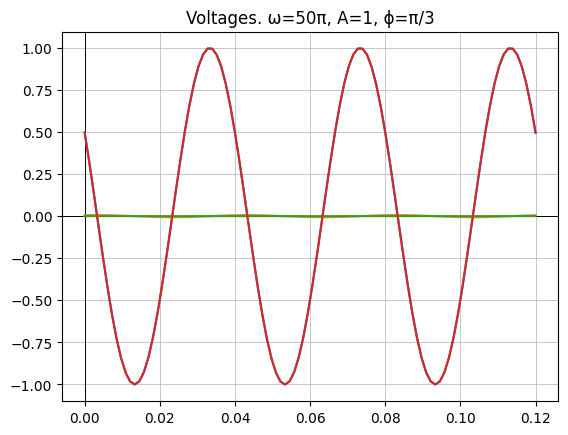

Eq(p_R.V, 4.05301160140932e-5)

In [5]:
# vg: blue; R.v: orange; C.v: green; L.v: red

A.value = 1;   ω.value = 50*pi;   ϕ.value = pi/3
plt.title("Voltages. ω=50π, A=1, ϕ=π/3")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

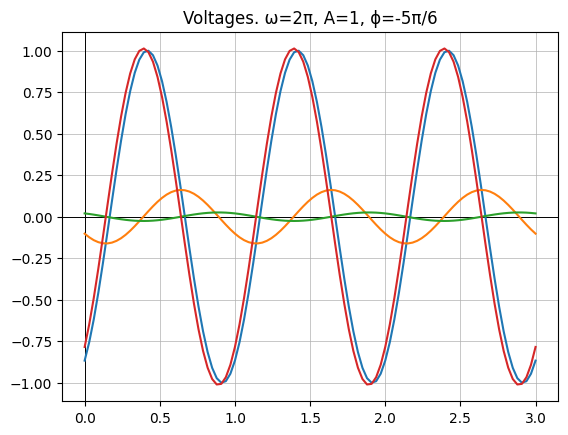

Eq(p_R.V, 0.025971497699138)

In [6]:
A.value = 1;   ω.value = 2*pi;   ϕ.value = -5/6*pi
plt.title("Voltages. ω=2π, A=1, ϕ=-5π/6")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

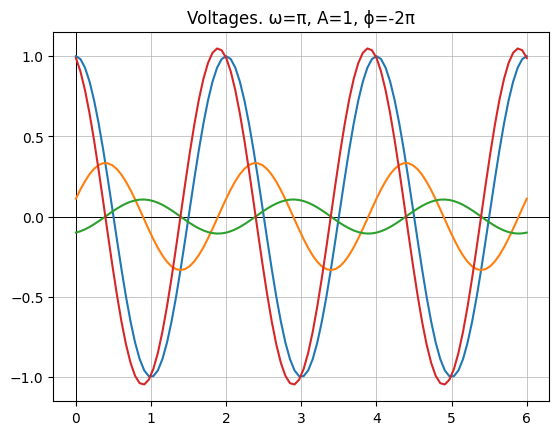

Eq(p_R.V, 0.111471217830853)

In [7]:
A.value = 1;   ω.value = pi;   ϕ.value = -2*pi
plt.title("Voltages. ω=π, A=1, ϕ=-2π")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

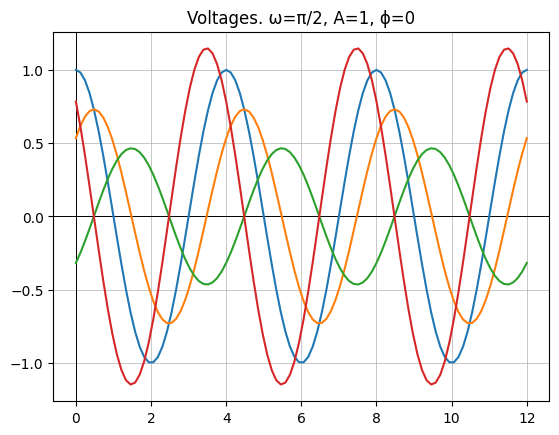

Eq(p_R.V, 0.533992398188101)

In [8]:
A.value = 1;   ω.value = pi/2;   ϕ.value = 0
plt.title("Voltages. ω=π/2, A=1, ϕ=0")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

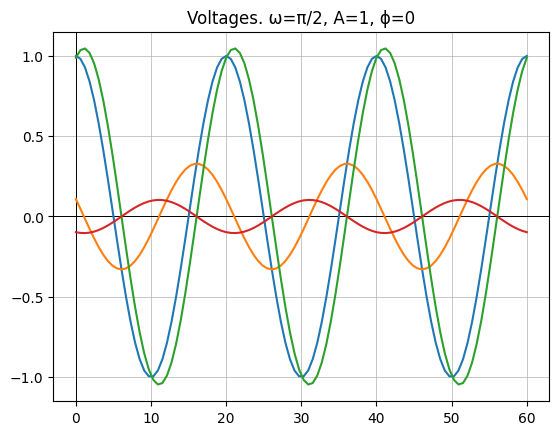

Eq(p_R.V, 0.108332803128057)

In [9]:
A.value = 1;   ω.value = pi/10;   ϕ.value = 0
plt.title("Voltages. ω=π/2, A=1, ϕ=0")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

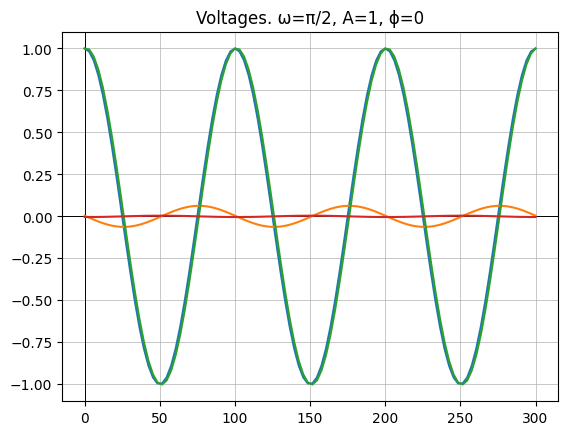

Eq(p_R.V, 0.00396342697113585)

In [10]:
A.value = 1;   ω.value = pi/50;   ϕ.value = 0
plt.title("Voltages. ω=π/2, A=1, ϕ=0")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

R.vp.valueEquation(evalf=True)

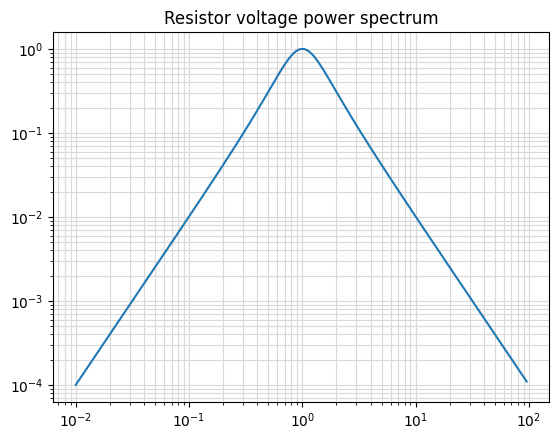

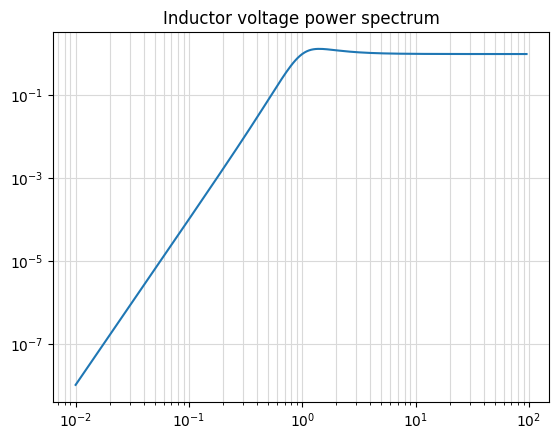

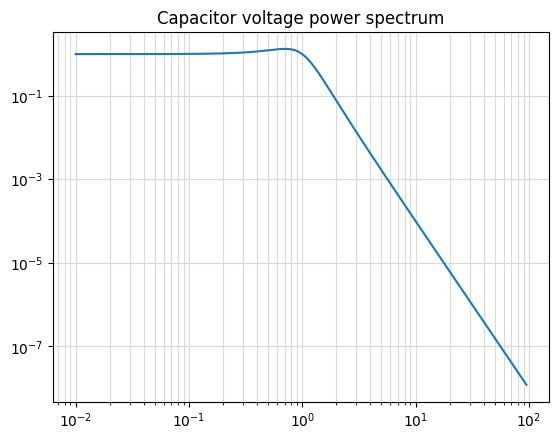

In [11]:
freqs = [10**(i/50) for i in range(-100, 100)]
ω.reset()
plt.loglog(freqs, evaluate_on_range(R.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Resistor voltage power spectrum")
plt.show()
plt.loglog(freqs, evaluate_on_range(L.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Inductor voltage power spectrum")
plt.show()
plt.loglog(freqs, evaluate_on_range(C.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Capacitor voltage power spectrum")
plt.show()